

**Lights out** is a famous puzzle game. The player is given a rectangular grid of lights which can be switched on and off. When you flip a switch inside one of those squares, it will toggle the on/off state of this and adjacent squares (up, down, left and right). Your goal is to turn all the lights off from a random starting light pattern.

## Example Puzzle

An example of the puzzle with 3 x 3 grid is shown in the figure below. The light squares are labelled from 0 to 8. We can represent the starting pattern using a list of numbers, where `1` represents lights switched on and `0` represnts ligths switched off. The list `lights` below represents the starting pattern in this example (squares 3, 5, 6, 7 are on and the rest are off):

```python
lights = [0, 0, 0, 1, 0, 1, 1, 1, 0]
```

The example puzzle can be solved by flipping the switches in square 0, 3 and 4 as illustrated step by step in the figure. If you play with it a little bit, you will soon notice **two important properties of this puzzle game**:

1. You don't need to flip a switch more than once.
2. The order of flipping doesn't matter.
3. The minimal solution is unique

Therefore, we can represent the puzzle solution as a list of numbers similar to the starting pattern. However, the meaning of `0` and `1` are different here:  `1` represents flipping a switch and `0` represents *not* flipping a switch. 

```python
solution = [1, 0, 0, 1, 1, 0, 0, 0, 0]
```

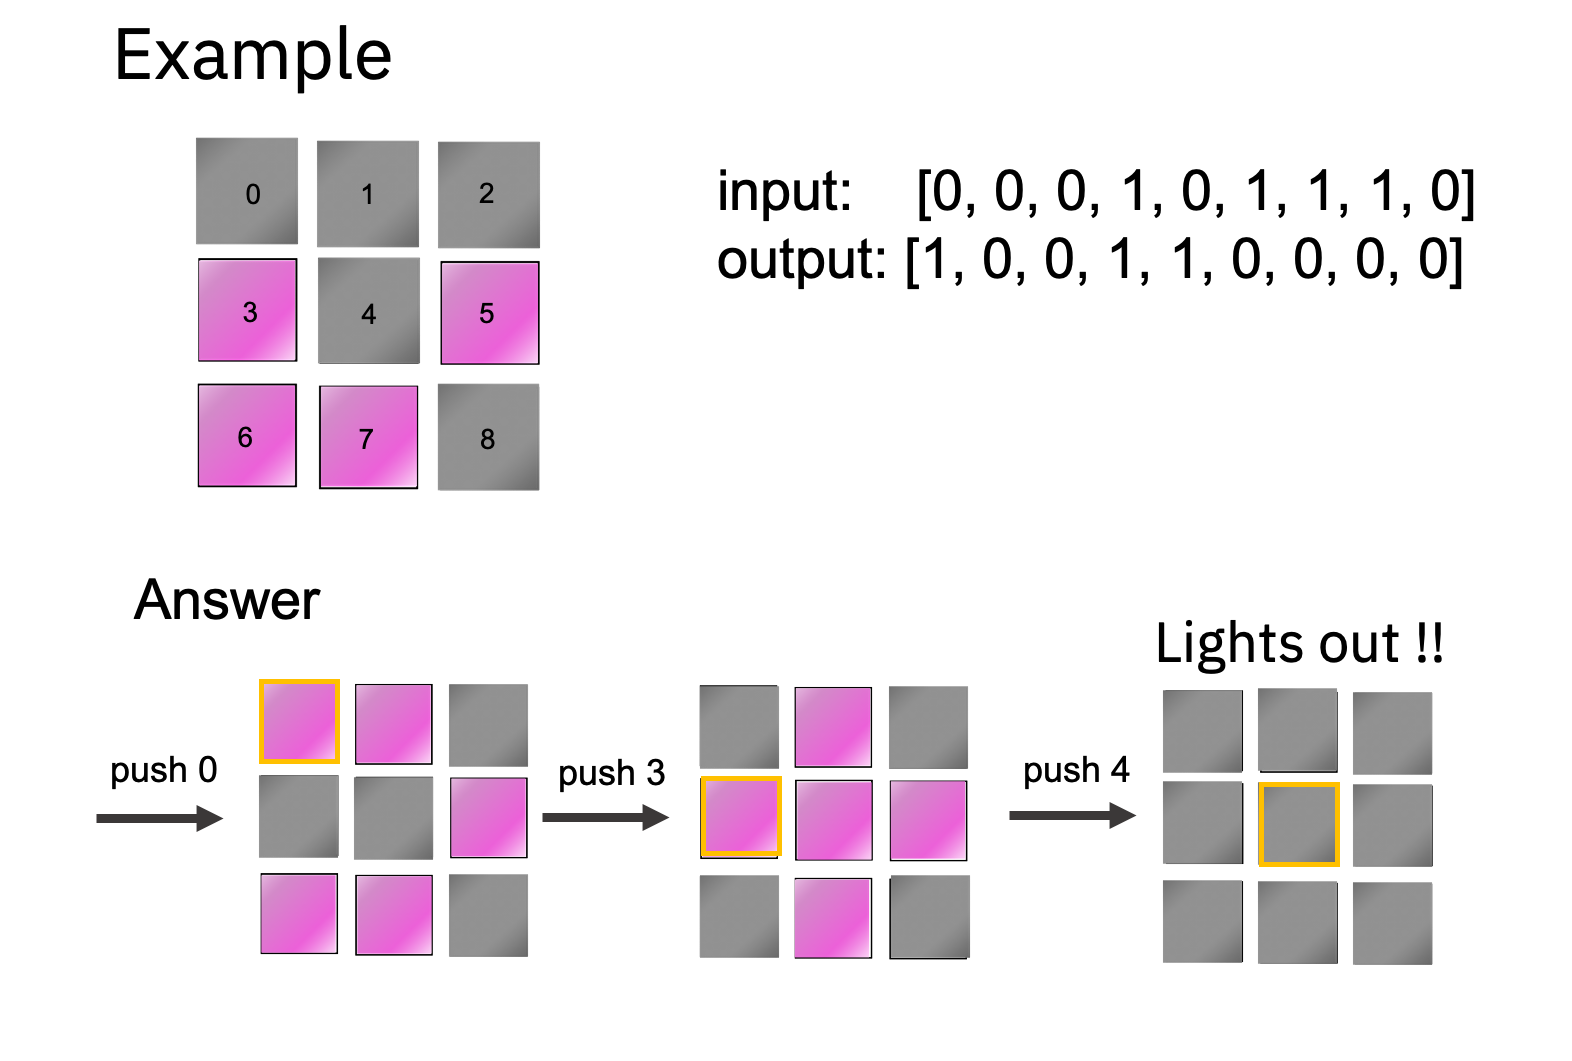

In [2]:
Image('lights_out_rule.png')



**Let's try to solve a "Lights Out" puzzle using **Grover's algorithm**!

Answer by creating a quantum circuit to solve the puzzle shown in the figure below. In the quantum circuit to be submitted, measure **only the `solution` (9bit)** that solves the puzzle. 
To submit your solution, create a function which takes `lights` as an input and then returns a  `QuantumCircuit`.  You can name the function as you like. Make sure it works even with another dataset of "lights". We will validate your circuit with different inputs.

**In addition, please implement the quantum circuit within 28 qubits.**

There are several ways to solve it without using Grover's algorithm, but we ask you to **use Grover's algorithm** for this exercise. It should help you in solving other challenges.

Please note that you can get the answer with the same endian as the one used in the description. You can also use the following function.
```python
qc = qc.reverse_bits()
```

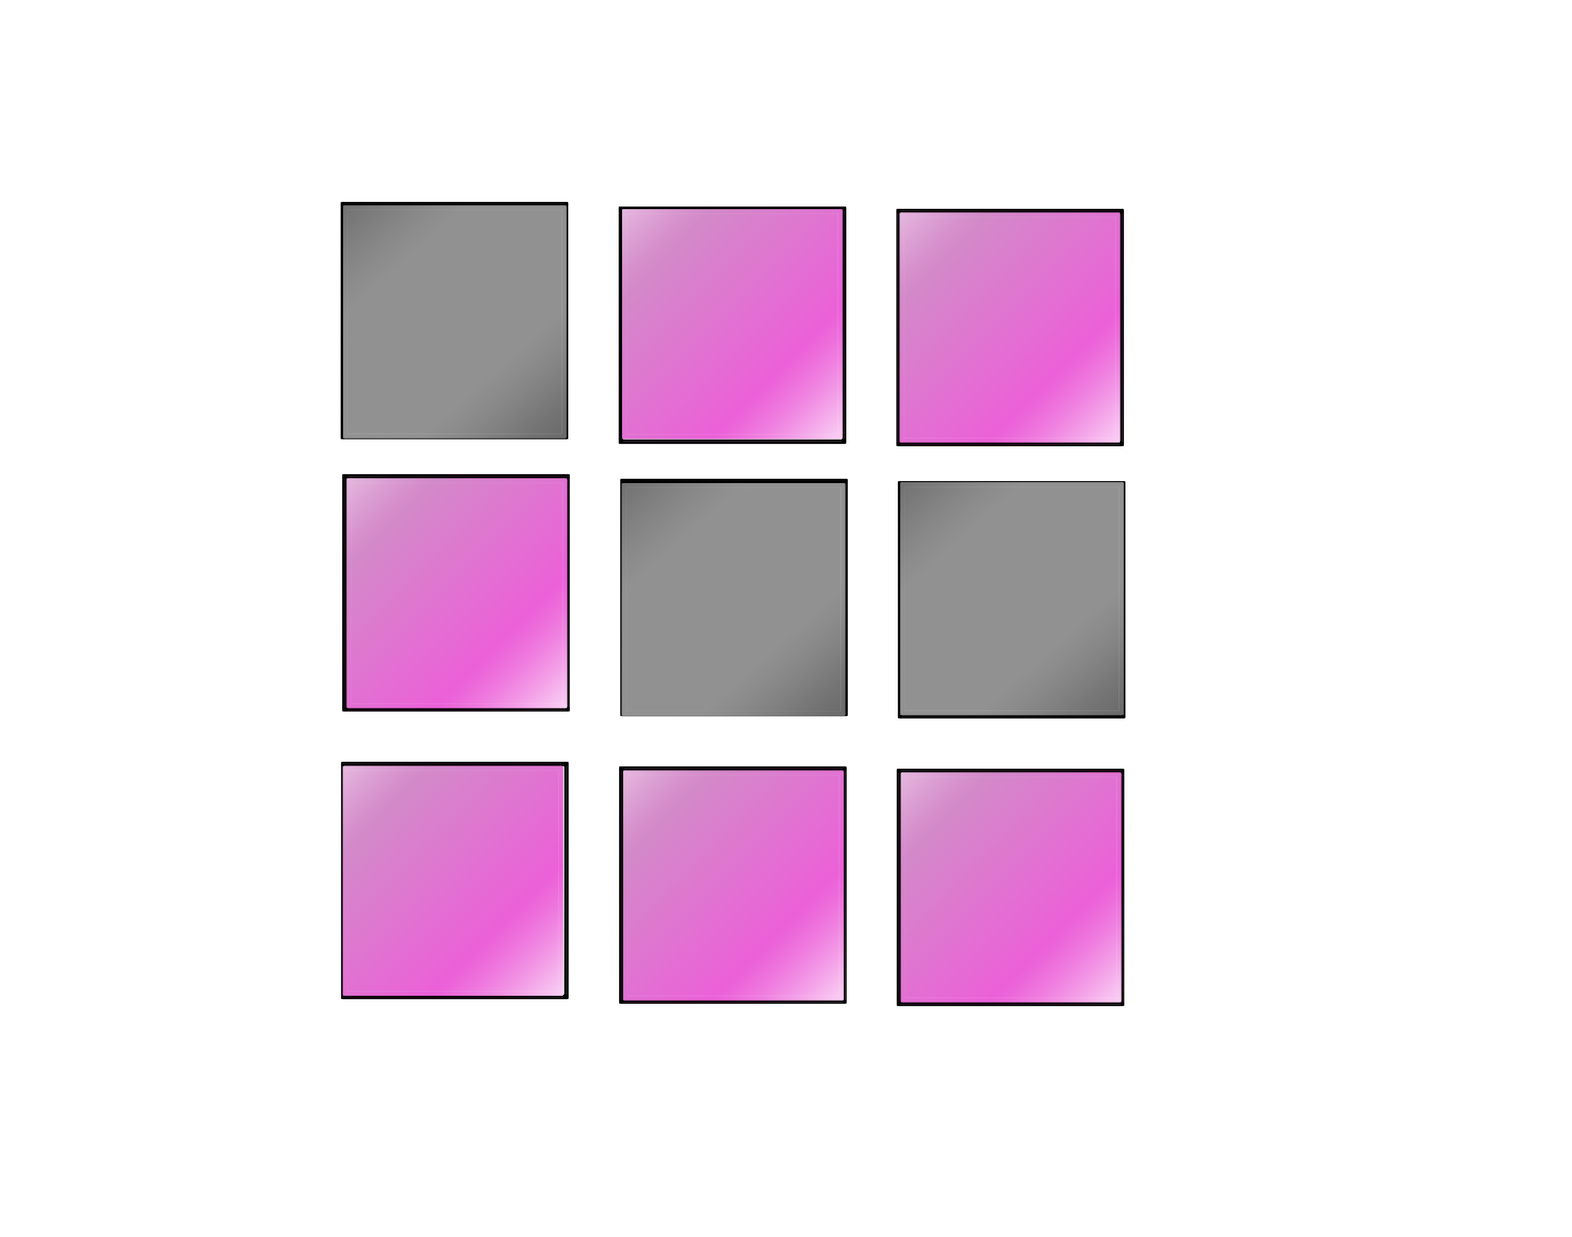

In [3]:
Image('lights_out_prob.png')

In [10]:
from qiskit import *
from qiskit.visualization import plot_histogram
provider = IBMQ.load_account()

/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


## Hint
You’ll need a more complex oracle than the “Week1-B oracle” to solve this problem. The added auxiliary qubits will help you design the oracle part, but they need to be handled with care.  At the end of the oracle part, all auxiliary qubits must be returned to their initial state (this operation is sometimes called Uncomputation). [Week 3 of last year’s IBM Quantum Challenge](https://github.com/quantum-challenge/2019/blob/master/problems/week3/week3_en.ipynb) will support your understanding of this concept. 

If you are not sure about the optimal number of iterations for Grover's algorithm, solve [this quiz](https://github.com/qiskit-community/IBMQuantumChallenge2020/tree/main/quizzes/quiz_1) and talk to Dr. Ryoko(@ryoko) in the [Qiskit slack](qiskit.slack.com) via direct message. You can get important formulas of the theoretical aspects of week 1-B.

In [7]:
#Create an oracle that understand the mechanics of the game, and marks an output qubit if all of the lights
#in the puzzle are turned off and we have found a solution.

def oracle(qc,lights,pushes_qubits,lights_qubits,output_qubit,cr):
    
    #press of light(0) flips the lights 0,1,3
    
    qc.cx(0,lights_qubits[0])
    qc.cx(0,lights_qubits[1])
    qc.cx(0,lights_qubits[3])
    
    #press of light(1) flips the lights 1,2,4,0
    
    qc.cx(1,lights_qubits[1])
    qc.cx(1,lights_qubits[2])
    qc.cx(1,lights_qubits[4])
    qc.cx(1,lights_qubits[0])
    
    #etc
    
    qc.cx(2,lights_qubits[1])
    qc.cx(2,lights_qubits[2])
    qc.cx(2,lights_qubits[5])
    
    qc.cx(3,lights_qubits[0])
    qc.cx(3,lights_qubits[3])
    qc.cx(3,lights_qubits[4])
    qc.cx(3,lights_qubits[6])
    
    qc.cx(4,lights_qubits[1])
    qc.cx(4,lights_qubits[3])
    qc.cx(4,lights_qubits[4])
    qc.cx(4,lights_qubits[5])
    qc.cx(4,lights_qubits[7])
    
    qc.cx(5,lights_qubits[2])
    qc.cx(5,lights_qubits[4])
    qc.cx(5,lights_qubits[5])
    qc.cx(5,lights_qubits[8])
    
    qc.cx(6,lights_qubits[3])
    qc.cx(6,lights_qubits[6])
    qc.cx(6,lights_qubits[7])
   
    qc.cx(7,lights_qubits[4])
    qc.cx(7,lights_qubits[6])
    qc.cx(7,lights_qubits[7])
    qc.cx(7,lights_qubits[8])
    
    qc.cx(8,lights_qubits[5])
    qc.cx(8,lights_qubits[7])
    qc.cx(8,lights_qubits[8])
    
    
    # Flip 'output' bit if all qubits are 1 (i.e. off)
    qc.mct(lights_qubits, output_qubit)
    #this is a multicontrol gate called a toffoli that flips a single qubit with multiple controls

    
    #we must then uncompute all of the mechanics of the game.
    
    qc.cx(0,lights_qubits[0])
    qc.cx(0,lights_qubits[1])
    qc.cx(0,lights_qubits[3])
    
    qc.cx(1,lights_qubits[1])
    qc.cx(1,lights_qubits[2])
    qc.cx(1,lights_qubits[4])
    qc.cx(1,lights_qubits[0])
    
    qc.cx(2,lights_qubits[1])
    qc.cx(2,lights_qubits[2])
    qc.cx(2,lights_qubits[5])
    
    qc.cx(3,lights_qubits[0])
    qc.cx(3,lights_qubits[3])
    qc.cx(3,lights_qubits[4])
    qc.cx(3,lights_qubits[6])
    
    qc.cx(4,lights_qubits[1])
    qc.cx(4,lights_qubits[3])
    qc.cx(4,lights_qubits[4])
    qc.cx(4,lights_qubits[5])
    qc.cx(4,lights_qubits[7])
    
    qc.cx(5,lights_qubits[2])
    qc.cx(5,lights_qubits[4])
    qc.cx(5,lights_qubits[5])
    qc.cx(5,lights_qubits[8])
    
    qc.cx(6,lights_qubits[3])
    qc.cx(6,lights_qubits[6])
    qc.cx(6,lights_qubits[7])
   
    qc.cx(7,lights_qubits[4])
    qc.cx(7,lights_qubits[6])
    qc.cx(7,lights_qubits[7])
    qc.cx(7,lights_qubits[8])
    
    qc.cx(8,lights_qubits[5])
    qc.cx(8,lights_qubits[7])
    qc.cx(8,lights_qubits[8])
    
    return qc


#The purpose of the diffuser is to amplify the state with negative phase that the oracle marked by reflecting the state by the superposition state S

def diffuser(nqubits,qc):
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    return qc


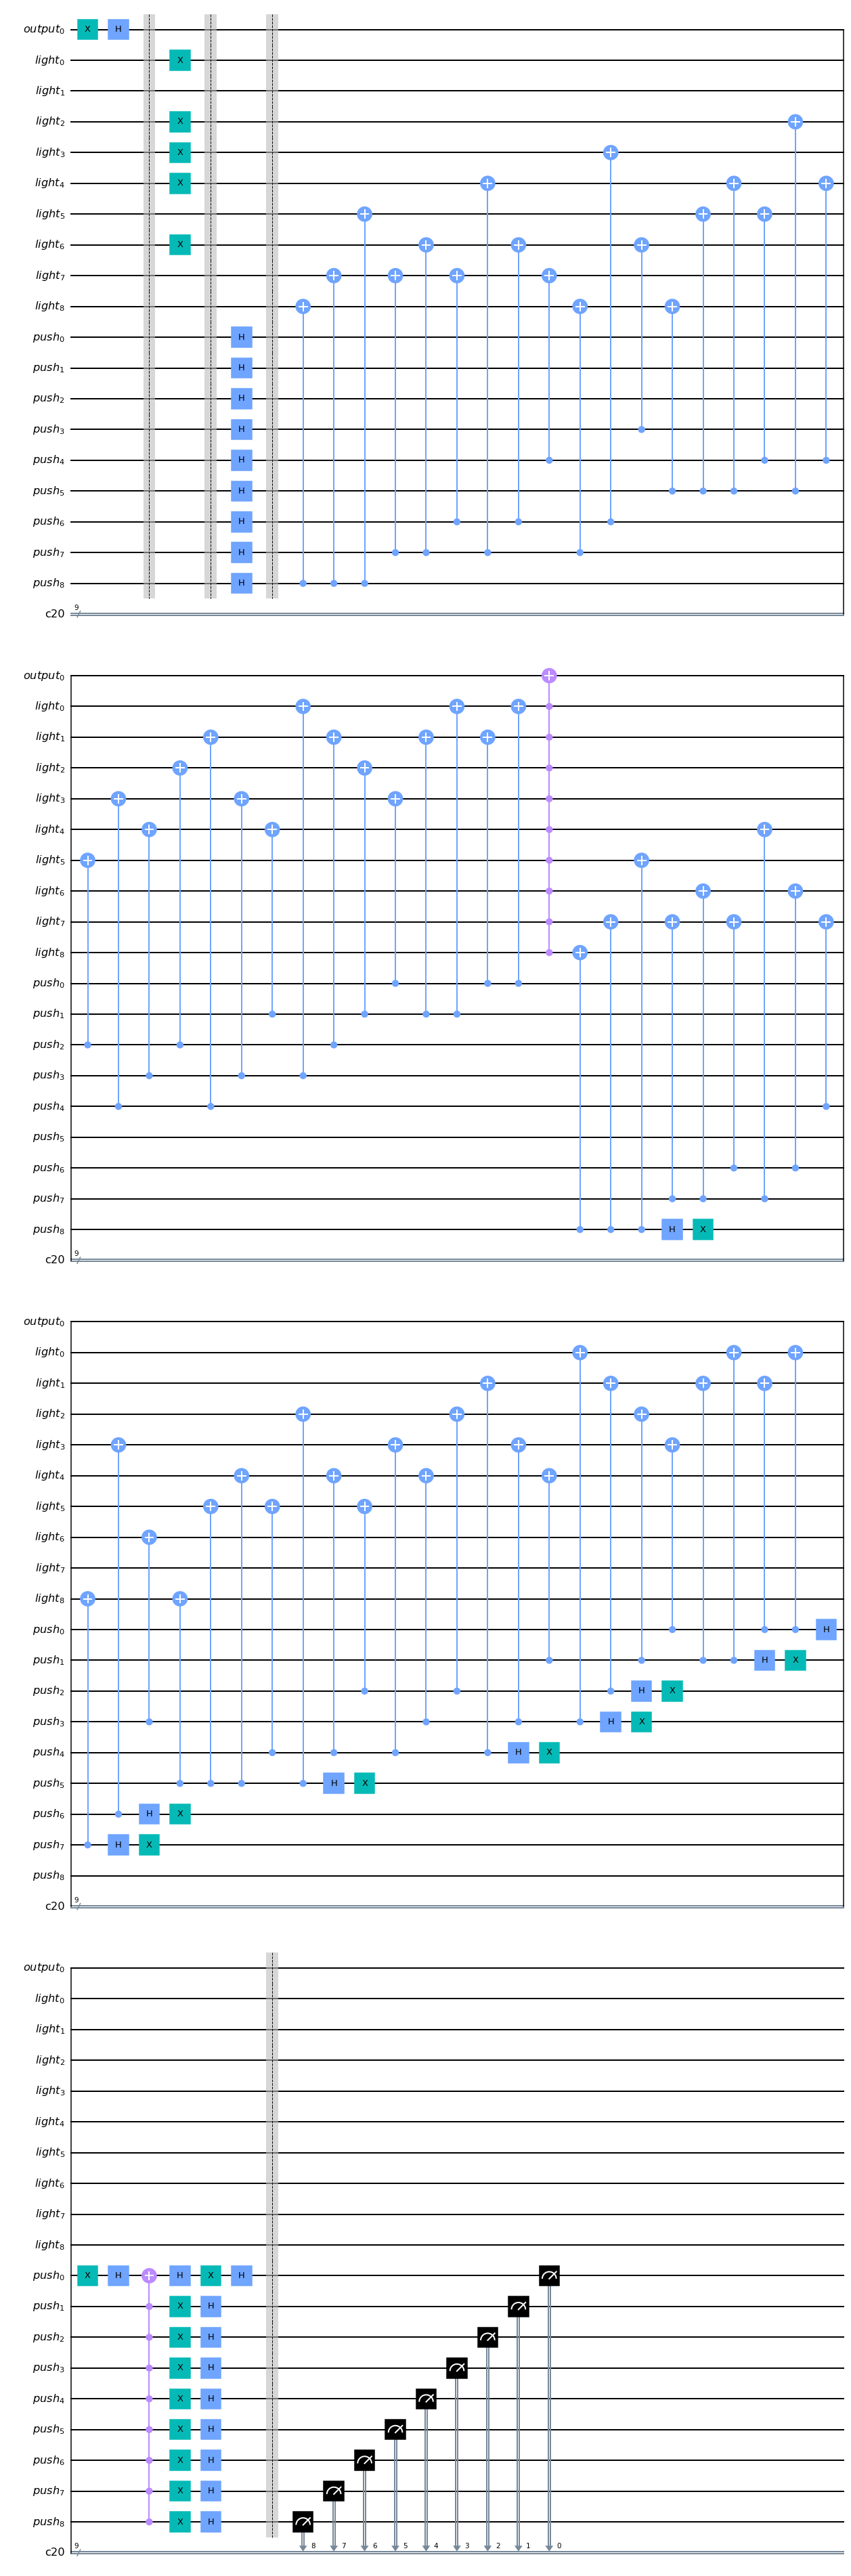

In [48]:
#Putting it all together
#Construct the circuit
lights = [1, 1, 0, 1, 0, 0, 0, 1, 0]

pushes_qubits = QuantumRegister(9, name='push')
lights_qubits = QuantumRegister(9, name='light')    
output_qubit = QuantumRegister(1, name='output')
cr = ClassicalRegister(9)
    
qc = QuantumCircuit(pushes_qubits, lights_qubits, output_qubit, cr)


#initialise output_qubit in |-> state
qc.x(output_qubit[0])
qc.h(output_qubit[0])
qc.barrier()
    
# initialise qubits in 0 or 1 state according to lights sequence. 0 on 1 off
for i in range(9):
    if (lights[i] == 0):
        qc.x(lights_qubits[i])
qc.barrier()            
#put pushes into superposition 
for i in range(9):
    qc.h(pushes_qubits[i])
    
qc.barrier()       
#oracle and diffuser iterations
oracle(qc,lights,pushes_qubits,lights_qubits,output_qubit,cr)
diffuser(9,qc)

qc.barrier()
    #measure
qc.measure(pushes_qubits,cr)
    # Change the endian qiskit automatically reverses the list of our classical bits. 
qc = qc.reverse_bits() 
   
qc.draw('mpl')
    
    

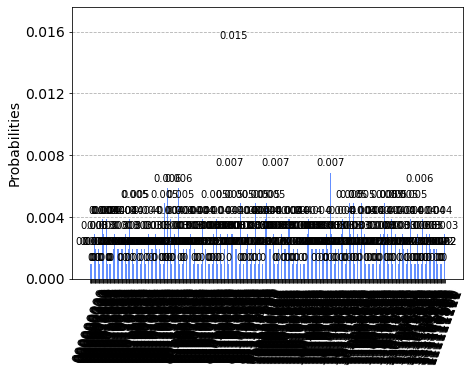

In [49]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [51]:
print(answer.most_frequent())

011010000


In [16]:
def solve_lights_out(lights,backend):
    pushes_qubits = QuantumRegister(9, name='push')
    lights_qubits = QuantumRegister(9, name='light')    
    output_qubit = QuantumRegister(1, name='output')
    cr = ClassicalRegister(9)
    
    qc = QuantumCircuit(pushes_qubits, lights_qubits, output_qubit, cr)
    qc.x(output_qubit[0])
    qc.h(output_qubit[0])
    qc.barrier()
    
    # initialise qubits in 0 or 1 state according to lights sequence. 0 on 1 off
    for i in range(9):
        if (lights[i] == 0):
            qc.x(lights_qubits[i])
    qc.barrier()            
#put pushes into superposition 
    for i in range(9):
        qc.h(pushes_qubits[i])
    
    qc.barrier()       
#oracle and diffuser iterations
    oracle(qc,lights,pushes_qubits,lights_qubits,output_qubit,cr)
    diffuser(9,qc)

    qc.barrier()
    #measure
    qc.measure(pushes_qubits,cr)
    # Change the endian qiskit automatically reverses the list of our classical bits. 
    qc = qc.reverse_bits() 
    
    backend1 = Aer.get_backend(backend)
    results = execute(qc, backend=backend1, shots=1024).result()
    answer = results.get_counts()
    
    print(answer.most_frequent())
    
    


In [17]:
solve_lights_out([0,1,1,1,1,1,1,0,0],'qasm_simulator')

100101110
